# Dropout Method


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [23]:
# Load data and split into train and test sets
data = fetch_california_housing()
x = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [24]:
# Define the model with dropout
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=25, hidden_layer2=30, output_features=1, dropout_prob=0.2):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.out(x)
        return x

model = Model()


In [25]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
patience = 10  # Number of epochs to wait before early stopping
early_stopping = False
val_loss_min = np.Inf  # Initialize minimum validation loss to infinity
val_loss_values = []
train_loss_values = []
patience_counter = 0


In [26]:
for i in range(epochs):
    model.train()  # Set the model to training mode
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train.view(-1, 1))
    train_loss_values.append(loss.item())  # Store the training loss

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_pred = model.forward(X_test)
        val_loss = criterion(val_pred, y_test.view(-1, 1))
        val_loss_values.append(val_loss.item())

    # Early stopping
    if val_loss.item() < val_loss_min:
        val_loss_min = val_loss.item()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {i+1}')
            early_stopping = True
            break

    print(f'epoch: {i+1:2}/{epochs} train_loss: {loss.item():10.8f} val_loss: {val_loss.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1/1000 train_loss: 7182.53076172 val_loss: 4330.49902344
epoch:  2/1000 train_loss: 1715.51879883 val_loss: 161.74363708
epoch:  3/1000 train_loss: 3712.23974609 val_loss: 2129.79638672
epoch:  4/1000 train_loss: 2529.07690430 val_loss: 1557.70202637
epoch:  5/1000 train_loss: 1277.01220703 val_loss: 521.07861328
epoch:  6/1000 train_loss: 636.67596436 val_loss: 52.16084671
epoch:  7/1000 train_loss: 538.29809570 val_loss: 40.31754303
epoch:  8/1000 train_loss: 709.42639160 val_loss: 212.20123291
epoch:  9/1000 train_loss: 766.91778564 val_loss: 337.76690674
epoch: 10/1000 train_loss: 733.31750488 val_loss: 326.68750000
epoch: 11/1000 train_loss: 602.46295166 val_loss: 247.83708191
epoch: 12/1000 train_loss: 424.58529663 val_loss: 154.33836365
epoch: 13/1000 train_loss: 279.62756348 val_loss: 74.01521301
epoch: 14/1000 train_loss: 167.20606995 val_loss: 23.54875374
epoch: 15/1000 train_loss: 106.39409637 val_loss: 3.42984796
epoch: 16/1000 train_loss: 80.63029480 val_loss: 3.42

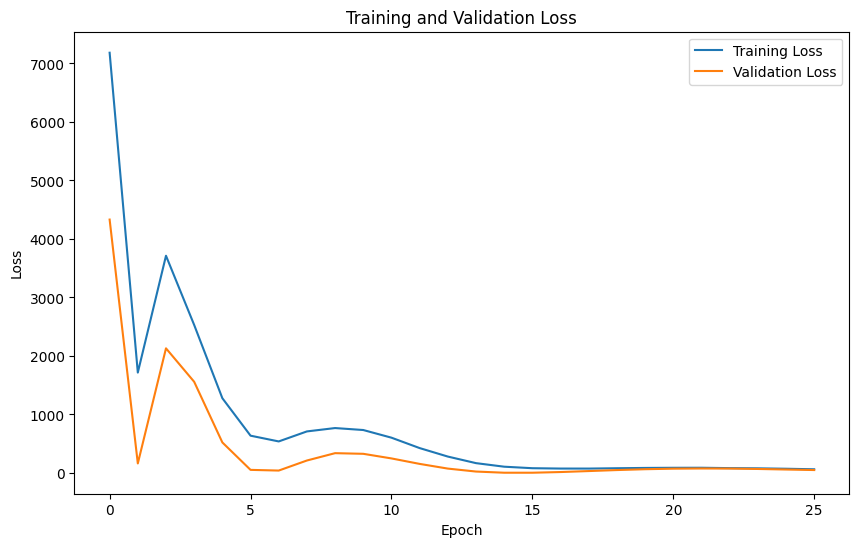

In [27]:
# Plot the training and validation losses on the same graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_loss_values)), train_loss_values, label='Training Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# L1 Regularization

In [28]:
x = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [29]:
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=25, hidden_layer2=30, output_features=1):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

model = Model()

In [30]:
criterion = nn.MSELoss()

# Adding L1 regularization (Lasso)
l1_lambda = 0.001  # Adjust lambda as needed
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
losses = []
l1_penalty = []


epoch:  1/1000  loss: 2988.87207031
epoch:  2/1000  loss: 230.29994202
epoch:  3/1000  loss: 1399.24938965
epoch:  4/1000  loss: 710.28948975
epoch:  5/1000  loss: 82.33863831
epoch:  6/1000  loss: 59.79894638
epoch:  7/1000  loss: 314.00979614
epoch:  8/1000  loss: 414.68008423
epoch:  9/1000  loss: 256.17718506
epoch: 10/1000  loss: 61.24460220
epoch: 11/1000  loss: 16.55661201
epoch: 12/1000  loss: 132.35420227
epoch: 13/1000  loss: 181.25392151
epoch: 14/1000  loss: 143.31533813
epoch: 15/1000  loss: 62.11433029
epoch: 16/1000  loss: 11.53611755
epoch: 17/1000  loss: 29.44827080
epoch: 18/1000  loss: 65.58691406
epoch: 19/1000  loss: 76.71035767
epoch: 20/1000  loss: 62.34167480
epoch: 21/1000  loss: 38.89947891
epoch: 22/1000  loss: 16.39518929
epoch: 23/1000  loss: 7.70695925
epoch: 24/1000  loss: 13.94582272
epoch: 25/1000  loss: 29.60603714
epoch: 26/1000  loss: 30.56666183
epoch: 27/1000  loss: 23.24403191
epoch: 28/1000  loss: 11.36532974
epoch: 29/1000  loss: 4.84201622
epoc

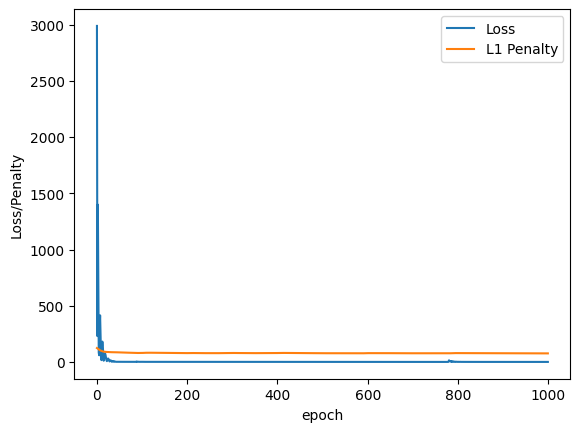

In [31]:
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train.view(-1, 1))

    # L1 regularization (Lasso)
    l1_regularization = 0
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
    loss += l1_lambda * l1_regularization

    losses.append(loss.detach())
    l1_penalty.append(l1_regularization.item())

    print(f'epoch: {i+1:2}/{epochs}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs), losses, label='Loss')
plt.plot(range(epochs), l1_penalty, label='L1 Penalty')
plt.ylabel('Loss/Penalty')
plt.xlabel('epoch')
plt.legend()
plt.show()

preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

# L2 regularization

In [32]:
x = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [33]:
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=25, hidden_layer2=30, output_features=1):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

model = Model()

In [34]:
criterion = nn.MSELoss()

# Adding L2 regularization (weight decay)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, weight_decay=1e-6)  # Adjust weight_decay as needed

epochs = 1000
losses = []
weight_decay = []

epoch:  1/1000  loss: 594.92785645
epoch:  2/1000  loss: 572.68713379
epoch:  3/1000  loss: 551.32403564
epoch:  4/1000  loss: 530.80377197
epoch:  5/1000  loss: 511.09381104
epoch:  6/1000  loss: 492.16244507
epoch:  7/1000  loss: 473.97796631
epoch:  8/1000  loss: 456.51065063
epoch:  9/1000  loss: 439.73416138
epoch: 10/1000  loss: 423.62234497
epoch: 11/1000  loss: 408.14511108
epoch: 12/1000  loss: 393.27755737
epoch: 13/1000  loss: 378.99649048
epoch: 14/1000  loss: 365.27883911
epoch: 15/1000  loss: 352.10363770
epoch: 16/1000  loss: 339.44952393
epoch: 17/1000  loss: 327.29534912
epoch: 18/1000  loss: 315.62145996
epoch: 19/1000  loss: 304.40884399
epoch: 20/1000  loss: 293.63970947
epoch: 21/1000  loss: 283.29537964
epoch: 22/1000  loss: 273.35931396
epoch: 23/1000  loss: 263.81622314
epoch: 24/1000  loss: 254.65043640
epoch: 25/1000  loss: 245.84777832
epoch: 26/1000  loss: 237.39285278
epoch: 27/1000  loss: 229.27204895
epoch: 28/1000  loss: 221.47283936
epoch: 29/1000  loss

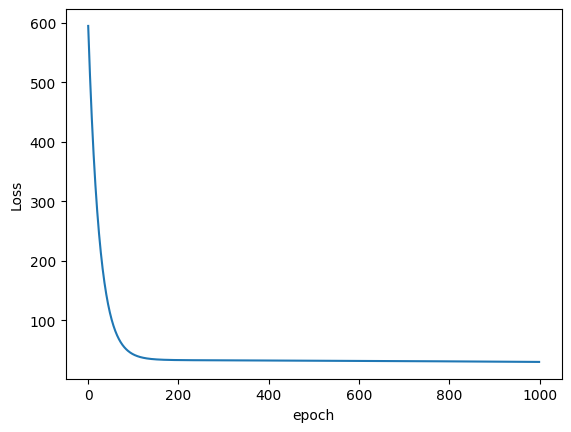

In [35]:
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train.view(-1, 1))

    losses.append(loss.detach())

    # Calculate L2 norms of weights
    l2_norms = 0.0
    for param in model.parameters():
        l2_norms += torch.norm(param)**2
    l2_norms = torch.sqrt(l2_norms)
    weight_decay.append(l2_norms.item())

    print(f'epoch: {i+1:2}/{epochs}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

# Early Stopping

In [36]:
x = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [37]:
# Define the model
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=25, hidden_layer2=30, output_features=1):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

model = Model()

In [38]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
patience = 10  # Number of epochs to wait before early stopping
early_stopping = False
val_loss_min = np.Inf  # Initialize minimum validation loss to infinity
val_loss_values = []
train_loss_values = []

Early stopping at epoch 32
Loaded model parameters from epoch 22 with lowest validation loss: 1.416238784790039


Text(0.5, 1.0, 'Training and Validation Loss')

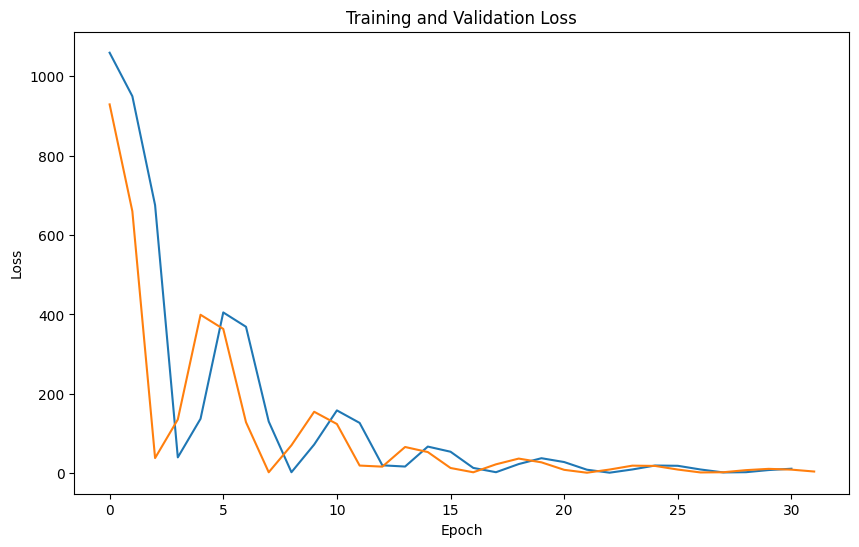

In [39]:
# Initialize the model parameters
import copy
best_model = copy.deepcopy(model.state_dict())

for i in range(epochs):
    # Train the model
    model.train()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train.view(-1, 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate and store the validation loss
    model.eval()
    with torch.no_grad():
        val_pred = model.forward(X_test)
        val_loss = criterion(val_pred, y_test.view(-1, 1))
        val_loss_values.append(val_loss.item())

    # Early stopping
    if val_loss.item() < val_loss_min:
        val_loss_min = val_loss.item()
        patience_counter = 0
        best_model = model.state_dict()  # Save the current best model parameters
        best_epoch = i + 1  # Update the epoch where the best validation loss occurred
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping at epoch {i+1}')
            early_stopping = True
            break

    # Store the training loss
    train_loss_values.append(loss.item())

# After early stopping, load the best model parameters
if early_stopping:
    model.load_state_dict(best_model)
    print(f'Loaded model parameters from epoch {best_epoch} with lowest validation loss: {val_loss_min}')

# Plot the training and validation losses on the same graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_loss_values)), train_loss_values, label='Training Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')